<a href="https://colab.research.google.com/github/andjela-robal/KlasifikacijaSlikaProjekat/blob/main/KlasifikacijaSlikaProjekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow
!pip install gdown

In [4]:
import gdown

In [5]:
file_id = '1JHblwM88w4g70lZwiLDf6qPz8t0wZnd6'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'input_test.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1JHblwM88w4g70lZwiLDf6qPz8t0wZnd6
From (redirected): https://drive.google.com/uc?id=1JHblwM88w4g70lZwiLDf6qPz8t0wZnd6&confirm=t&uuid=fc92ad31-dbac-4da0-bd9f-62b39ac0bfe7
To: /content/input_test.csv
100%|██████████| 300M/300M [00:03<00:00, 89.9MB/s]


'input_test.csv'

In [6]:
file_id = '1jQ16W4DJG1ZfJ_R7V_9cQIALwN3lruE5'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'input.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1jQ16W4DJG1ZfJ_R7V_9cQIALwN3lruE5
From (redirected): https://drive.google.com/uc?id=1jQ16W4DJG1ZfJ_R7V_9cQIALwN3lruE5&confirm=t&uuid=b58ce039-75ef-42ed-aae7-5cf643533f7f
To: /content/input.csv
100%|██████████| 1.50G/1.50G [00:22<00:00, 66.4MB/s]


'input.csv'

In [7]:
file_id = '1cGDczlanBC59TbpNIe8_s0-yUtIrmnwm'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'labels_test.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1cGDczlanBC59TbpNIe8_s0-yUtIrmnwm
To: /content/labels_test.csv
100%|██████████| 800/800 [00:00<00:00, 2.42MB/s]


'labels_test.csv'

In [8]:
file_id = '1Zy3y6wBLZTI67BZhXzwQtgWJ8m50Oggl'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'labels.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Zy3y6wBLZTI67BZhXzwQtgWJ8m50Oggl
To: /content/labels.csv
100%|██████████| 4.00k/4.00k [00:00<00:00, 10.3MB/s]


'labels.csv'

In [9]:
!ls /content

input.csv  input_test.csv  labels.csv  labels_test.csv	sample_data


In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [11]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [14]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [18]:
X_train = X_train/255.0
X_test = X_test/255.0


In [15]:
print("Oblik X_train  :", X_train.shape)
print("Oblik Y_train  :", Y_train.shape)
print("Oblik X_test   :", X_test.shape)
print("Oblik Y_test   :", Y_test.shape)

Oblik X_train  : (2000, 100, 100, 3)
Oblik Y_train  : (2000, 1)
Oblik X_test   : (400, 100, 100, 3)
Oblik Y_test   : (400, 1)


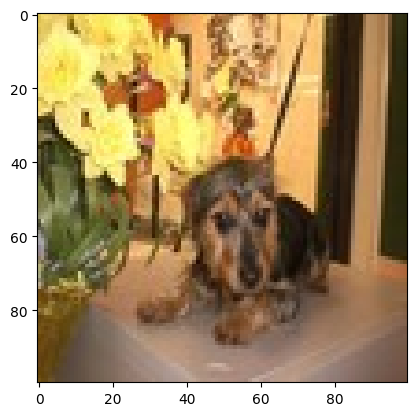

In [19]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


In [21]:
model = Sequential([
Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
MaxPooling2D((2,2)),

Conv2D(32, (3,3), activation = 'relu'),
MaxPooling2D((2,2)),

Flatten(),
Dense(64, activation = 'relu'),
Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 923ms/step - accuracy: 0.5152 - loss: 0.9817
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5534 - loss: 0.6830
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6639 - loss: 0.6231
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 936ms/step - accuracy: 0.7221 - loss: 0.5455
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 910ms/step - accuracy: 0.7478 - loss: 0.5106


In [24]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.6469 - loss: 0.6022


[0.6036432981491089, 0.6600000262260437]

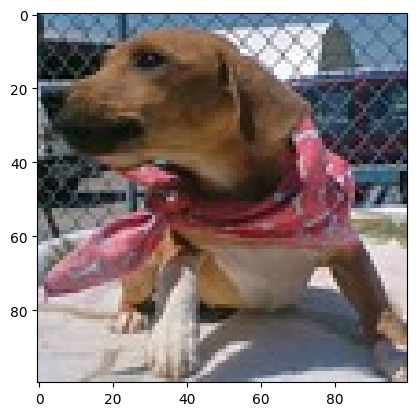

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Ovo je slika: psa


In [29]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
 pred = 'psa'
else:
 pred= 'mačke'

print("Ovo je slika:", pred)
